In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/gdrive/My Drive/CBIS-DDSM final train_test mammogram data/train'
valid_path = '/content/gdrive/My Drive/CBIS-DDSM final train_test mammogram data/test'


In [ ]:
# add preprocessing layer to the front of VGG
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in resnet.layers:
  layer.trainable = False

In [ ]:
# useful for getting number of classes
folders = glob('/content/gdrive/My Drive/CBIS-DDSM final train_test mammogram data/train/*')

In [ ]:
model = Sequential()
model.add(resnet)
model.add(Flatten())
#model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# view the structure of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_2 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               12845184  
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 36,433,025
Trainable params: 12,845,313
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/gdrive/My Drive/CBIS-DDSM final train_test mammogram data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/gdrive/My Drive/CBIS-DDSM final train_test mammogram data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 370 images belonging to 2 classes.
Found 357 images belonging to 2 classes.


In [ ]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
12/12 [==============================] - 785s 65s/step - loss: 1.1921e-07 - accuracy: 0.5000 - val_loss: 1.1921e-07 - val_accuracy: 0.5000
Epoch 2/10
12/12 [==============================] - 74s 6s/step - loss: 1.1921e-07 - accuracy: 0.5000 - val_loss: 1.1921e-07 - val_accuracy: 0.5000
Epoch 3/10
12/12 [==============================] - 74s 6s/step - loss: 1.1921e-07 - accuracy: 0.5000 - val_loss: 1.1921e-07 - val_accuracy: 0.5000
Epoch 4/10
12/12 [==============================] - 74s 6s/step - loss: 1.1921e-07 - accuracy: 0.5000 - val_loss: 1.1921e-07 - val_accuracy: 0.5000
Epoch 5/10
12/12 [==============================] - 74s 6s/step - loss: 1.1921e-07 - accuracy: 0.5000 - val_loss: 1.1921e-07 - val_accuracy: 0.5000
Epoch 6/10
12/12 [==============================] - 73s 6s/step - loss: 1.1921e-07 - accuracy: 0.5000 - val_loss: 1.1921e-07 - val_accuracy: 0.5000
Epoch 7/10
12/12 [================

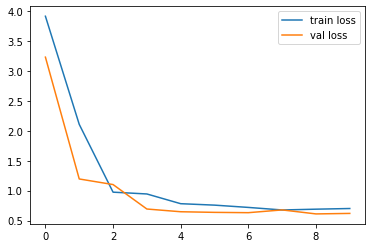

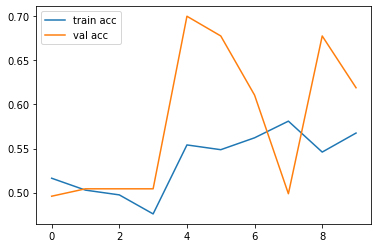

<Figure size 432x288 with 0 Axes>

In [ ]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
predictions = model.predict(test_set).argmax( axis=-1 ) 


In [ ]:
print(len(predictions))
predictions.resize(357,refcheck=False)
print(len(predictions))

357
357


In [ ]:
print ( predictions )

[0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 1
 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1
 1 1 0 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0
 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1
 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 1 1 0 0 0
 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0]


In [ ]:
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
#print(test_set)
print('F1_score : ',f1_score(test_set.classes,predictions,average='micro'))
print('sensitibity : ',metrics.recall_score(test_set.classes,predictions,average='micro'))

F1_score :  0.5070028011204482
sensitibity :  0.5070028011204482


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_set.classes, predictions))

              precision    recall  f1-score   support

           0       0.52      0.32      0.39       180
           1       0.50      0.70      0.58       177

    accuracy                           0.51       357
   macro avg       0.51      0.51      0.49       357
weighted avg       0.51      0.51      0.49       357



In [ ]:
def plot_roc_curve(fpr,tpr): 
  plt.plot(fpr,tpr) 
  plt.axis([0,1,0,1]) 
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate') 
  plt.show() 

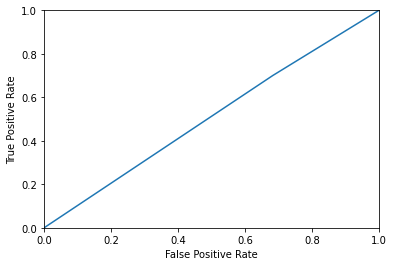

0.5086158192090395
0.018659699242974316


In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import matthews_corrcoef

fpr , tpr , thresholds = roc_curve (test_set.classes,predictions)
plot_roc_curve (fpr,tpr)
auc_score=roc_auc_score(test_set.classes,predictions) 
print(auc_score) 
print(matthews_corrcoef(test_set.classes,predictions))